# Assumptions for Linear Regression

In linear regression, there are several **assumptions that need to be satisfied** for the model to be valid. Multicollinearity primarily violates the assumption of independence among the predictor variables. Here are the key assumptions in linear regression:

1. **Linearity**: The relationship between the dependent variable and the predictor variables is assumed to be linear. This means that the effect of a one-unit change in a predictor variable is constant across all levels of that variable.

2. **Independence**: The observations in the dataset are assumed to be independent of each other. In the context of multicollinearity, this assumption is violated because highly correlated predictor variables introduce dependence among the observations.

3. **Homoscedasticity**: The error terms (residuals) should have constant variance across all levels of the predictor variables. Homoscedasticity ensures that the spread of the residuals is consistent throughout the range of predicted values.

4. **Normality**: The error terms are assumed to be normally distributed. This assumption allows for valid hypothesis testing, confidence interval construction, and the use of certain statistical tests.

5. **No autocorrelation**: The error terms should be uncorrelated with each other. Autocorrelation occurs when the residuals from a regression model are correlated over time or within specific groups of observations.

6. **No perfect multicollinearity**: There should be no perfect linear relationship among the predictor variables. Perfect multicollinearity occurs when one predictor variable is a perfect linear combination of other predictor variables, leading to numerical instability and rendering the model unidentifiable.

While multicollinearity primarily affects the assumption of independence, it can also have implications for other assumptions, such as the interpretation of coefficients and the accuracy of statistical tests. Therefore, addressing multicollinearity is crucial to ensure the validity of the linear regression model.

# Simple Linear Regression

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

# !pip install celluloid

In [113]:
df = pd.read_csv("/content/cars-24-clean-data")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,selling_price,year,km_driven,mileage,engine,max_power,make,model,transmission_type,seats_coupe,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_petrol,seller_dealer,seller_individual,seller_trustmark dealer
0,1.20,2012.0,120000,19.70,796.0,46.30,Maruti,Alto Std,1,0,1,0,0,0,0,0,1,0,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,Hyundai,Grand i10 Asta,1,0,1,0,0,0,0,0,1,0,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,Hyundai,i20 Asta,1,0,1,0,0,0,0,0,1,0,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,Maruti,Alto K10 2010-2014 VXI,1,0,1,0,0,0,0,0,1,0,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,1,0,1,0,0,1,0,0,0,1,0,0


In [114]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'make', 'model', 'transmission_type', 'seats_coupe', 'seats_family',
       'seats_large', 'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_lpg',
       'fuel_petrol', 'seller_dealer', 'seller_individual',
       'seller_trustmark dealer'],
      dtype='object')

In [115]:
df.shape

(19820, 20)

Target variable = selling_price

Feature varuable = max_power

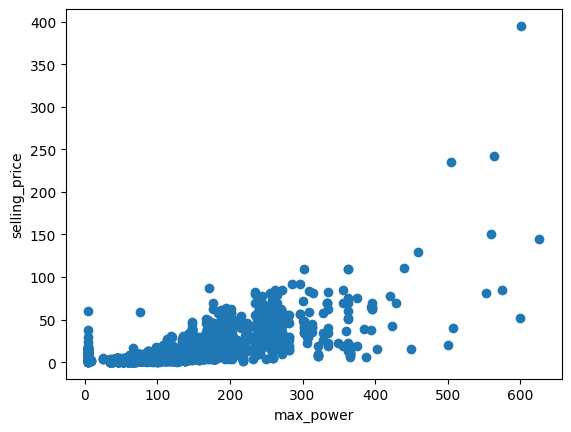

In [116]:
# define X and y
X = df['max_power'].values
Y = df['selling_price'].values

plt.scatter(X,Y)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

In [117]:
def univariate_linear_hypothesis(x, theta):
  y_hat = theta[0] + theta[1]*x
  return y_hat

In [118]:
def cost(X,Y, theta):
  m = X.shape[0] # number of training example
  total_error = 0.0
  for i in range(m):
    y_ = univariate_linear_hypothesis(X[i], theta)
    total_error += (y_ - Y[i])**2
  return (total_error/m)  

## Gradient Descent from scratch

<ipython-input-119-06148e633530>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


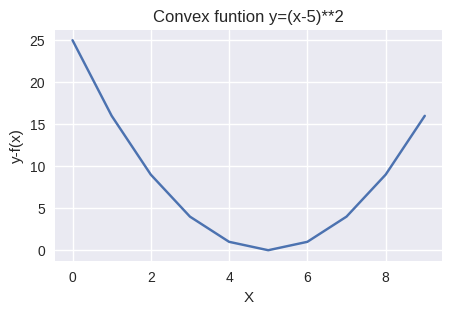

In [119]:
plt.figure(figsize=(5,3))
X = np.arange(10)
Y = (X-5)**2
plt.style.use('seaborn')
plt.plot(X,Y)
plt.ylabel("y-f(x)")
plt.xlabel("X")
plt.title("Convex funtion y=(x-5)**2")
plt.show()

In [120]:
# Given data points
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([3, 5, 7, 9, 11])

x = df['max_power'].values
y = df['selling_price'].values

# Standardizing Data
u = x.mean()
std = x.std()
x =  (x-u)/std
# Initialize parameters
m = 0.0
c = 0.0
errors = []
# Define learning rate and number of iterations
learning_rate = 0.1
num_iterations = 60

c_list = []
m_list = [m]
# Perform gradient descent
n = len(x)

for i in range(num_iterations):
    # Calculate predicted values
    c_list.append(c)
    m_list.append(m)
    predicted_y = m * x + c
    
    # Calculate gradients
    gradient_m = (2/n) * np.sum((predicted_y - y) * x)
    gradient_c = (2/n) * np.sum(predicted_y - y)
    
    # Update parameters
    m = m - learning_rate * gradient_m
    c = c - learning_rate * gradient_c
    
    # Calculate Mean Squared Error (MSE)
    mse = (1/n) * np.sum((predicted_y - y)**2)
    errors.append(mse)
    # Print MSE for monitoring
    print(f"Iteration {i+1}: MSE = {mse}, Updated m = {m}, Updated c ={c}")

# Print final parameters
print("Optimal parameters:")
print("m =", m)
print("c =", c)


Iteration 1: MSE = 136.63651343311147, Updated m = 1.3315653574511908, Updated c =1.4776845775983858
Iteration 2: MSE = 101.02695132478536, Updated m = 2.3968176434121427, Updated c =2.6598322396770944
Iteration 3: MSE = 78.23683157545663, Updated m = 3.2490194721809047, Updated c =3.605550369340061
Iteration 4: MSE = 63.65115493588627, Updated m = 3.930780935195914, Updated c =4.362124873070434
Iteration 5: MSE = 54.316321886561234, Updated m = 4.476190105607921, Updated c =4.9673844760547325
Iteration 6: MSE = 48.342028734993214, Updated m = 4.912517441937528, Updated c =5.451592158442171
Iteration 7: MSE = 44.51848111798968, Updated m = 5.261579311001213, Updated c =5.838958304352122
Iteration 8: MSE = 42.07141064310742, Updated m = 5.5408288062521605, Updated c =6.148851221080083
Iteration 9: MSE = 40.505285539182765, Updated m = 5.764228402452918, Updated c =6.396765554462451
Iteration 10: MSE = 39.50296547267099, Updated m = 5.942948079413525, Updated c =6.595097021168346
Iterati

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


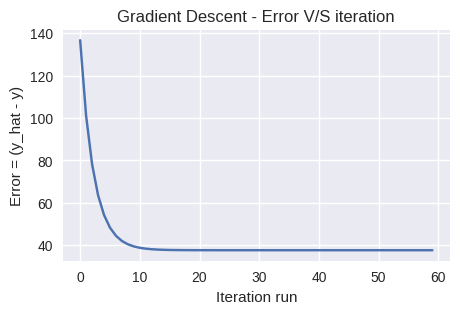

In [121]:
plt.figure(figsize=(5,3))
plt.plot(errors)
plt.xlabel("Iteration run")
plt.ylabel("Error = (y_hat - y)")
plt.title("Gradient Descent - Error V/S iteration")
plt.show()

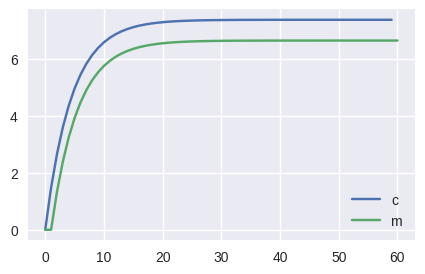

In [122]:
plt.figure(figsize=(5,3))

plt.plot(c_list, label='c')
plt.plot(m_list, label='m')
plt.legend()
plt.show()

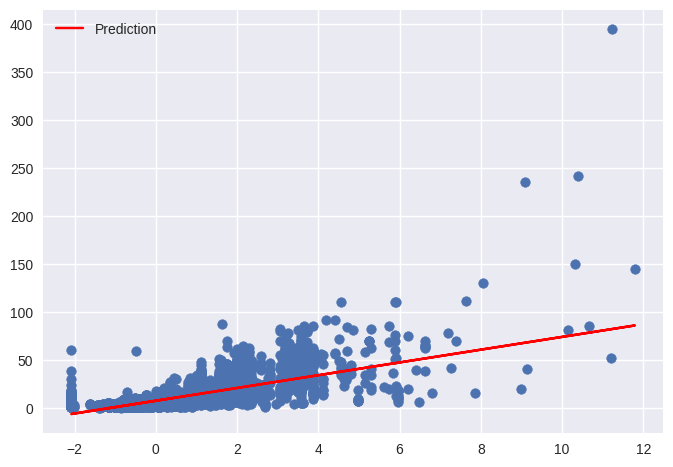

In [123]:
fig = plt.figure()
plt.scatter(x,y)
plt.plot(x,predicted_y, 'r-', label='Prediction')
plt.legend()
plt.show()

In [124]:
#r2 = 1 - (SSR/SST)

def r2_score(y,predicted_y):
  SSR = np.sum((predicted_y - y.mean())**2)
  SST = np.sum((y - y.mean())**2)
  score = 1 - (SSR/SST)
  return score  
r2_score(y,predicted_y)

0.4597474817559859

Observation:
* 46% of variation in y is explained by x
* For 1 input variable/feature 0.46 is prety good

## From sklearn

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
X = df['max_power'].values
Y = df['selling_price'].values

X = (X - X.mean()) / X.std()
#Y = (Y - Y.mean()) / Y.std()
print(X)
print(Y)
print("Length of X : ",len(X)," Shape of X : ", X.shape)
print("Length of Y : ",len(Y)," Shape of X : ", Y.shape)


[-1.15777962 -0.36020313 -0.40488529 ...  0.12057687  0.93557939
  0.43513924]
[ 1.2   5.5   2.15 ...  4.25 12.25 12.  ]
Length of X :  19820  Shape of X :  (19820,)
Length of Y :  19820  Shape of X :  (19820,)


scikit-learn's LinearRegression model expects a 2D array for the features (X).

To resolve this issue, you can reshape your 1D array using the reshape function in NumPy to convert it into a 2D array with a single column.

In [127]:
X = X.reshape(X.size, 1)
Y = Y.reshape(Y.size, 1)
print(X)
print(Y)
print("Length of X : ",len(X)," Shape of X : ", X.shape)
print("Length of Y : ",len(Y)," Shape of X : ", Y.shape)

[[-1.15777962]
 [-0.36020313]
 [-0.40488529]
 ...
 [ 0.12057687]
 [ 0.93557939]
 [ 0.43513924]]
[[ 1.2 ]
 [ 5.5 ]
 [ 2.15]
 ...
 [ 4.25]
 [12.25]
 [12.  ]]
Length of X :  19820  Shape of X :  (19820, 1)
Length of Y :  19820  Shape of X :  (19820, 1)


In [128]:
model = LinearRegression()
model.fit(X,Y) # Training

LinearRegression()

In [129]:
print("c = ",model.intercept_)
print("m = ",model.coef_)
print("r2_score = ", model.score(X,Y))

c =  [7.38842289]
m =  [[6.65782679]]
r2_score =  0.5402545880839582


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
output = model.predict(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(Y,output)
MSE = mean_squared_error(Y, output)
RMSE = np.sqrt(MSE)
print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)

MAE :  3.0911161838782792
MSE :  37.72106313220562
RMSE :  6.141747563373605


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


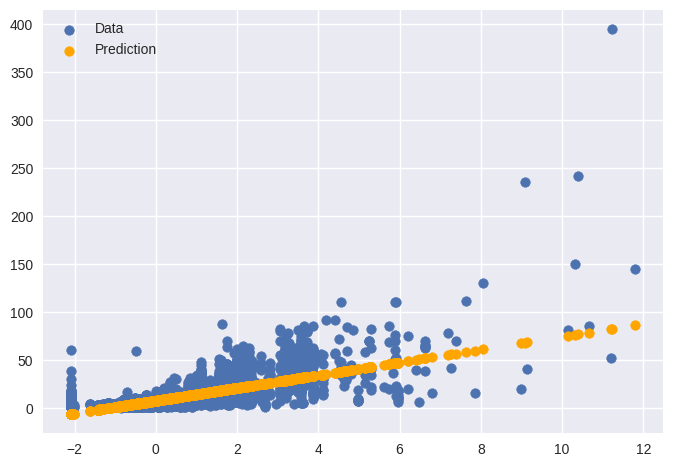

In [132]:
fig = plt.figure()
plt.scatter(X,Y, label='Data')
plt.scatter(X,output,color='orange', label='Prediction')
plt.legend()
plt.show()

-----------
# Multiple Linear Regression

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv("/content/cars-24-clean-data")
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,make,model,transmission_type,seats_coupe,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_petrol,seller_dealer,seller_individual,seller_trustmark dealer
0,1.20,2012.0,120000,19.70,796.0,46.30,Maruti,Alto Std,1,0,1,0,0,0,0,0,1,0,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,Hyundai,Grand i10 Asta,1,0,1,0,0,0,0,0,1,0,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,Hyundai,i20 Asta,1,0,1,0,0,0,0,0,1,0,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,Maruti,Alto K10 2010-2014 VXI,1,0,1,0,0,0,0,0,1,0,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,1,0,1,0,0,1,0,0,0,1,0,0


In [135]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19820, 20)

In [136]:
df.isnull().sum()

selling_price              0
year                       0
km_driven                  0
mileage                    0
engine                     0
max_power                  0
make                       0
model                      0
transmission_type          0
seats_coupe                0
seats_family               0
seats_large                0
fuel_cng                   0
fuel_diesel                0
fuel_electric              0
fuel_lpg                   0
fuel_petrol                0
seller_dealer              0
seller_individual          0
seller_trustmark dealer    0
dtype: int64

In [137]:
df.dropna(inplace=True)
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


selling_price              0
year                       0
km_driven                  0
mileage                    0
engine                     0
max_power                  0
make                       0
model                      0
transmission_type          0
seats_coupe                0
seats_family               0
seats_large                0
fuel_cng                   0
fuel_diesel                0
fuel_electric              0
fuel_lpg                   0
fuel_petrol                0
seller_dealer              0
seller_individual          0
seller_trustmark dealer    0
dtype: int64

In [138]:
# Droping categorical variable
df.drop(['model','make'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
X = df[df.columns.drop('selling_price')] # Apply standization or Normalization
Y = df['selling_price']  # Never ever transform Y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
print("Shape of X: ",X.shape)
print("Shape of Y: ",Y.shape)

Shape of X:  (19820, 17)
Shape of Y:  (19820,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
# Applying standardization on X
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
ss = StandardScaler()
# X = ss.fit_tansform(X) # This will result in a numpy array but we want dataframe

std_X = ss.fit_transform(X)
# the std_data is numpy array we we need dataframe so
std_X = pd.DataFrame(data=std_X, columns=X.columns)
std_X.head()

,year,km_driven,mileage,engine,max_power,transmission_type,seats_coupe,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_petrol,seller_dealer,seller_individual,seller_trustmark dealer
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.495818,-0.110946,0.20159,-0.166238,-0.127286,-0.985275,-0.020095,-0.056917,1.024622,-1.224101,1.248892,-0.098382
4,0.137194,-0.544502,0.760085,0.042999,0.010435,0.495818,-0.110946,0.20159,-0.166238,-0.127286,1.014945,-0.020095,-0.056917,-0.975970,0.816926,-0.800710,-0.098382


In [142]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression()

In [143]:
lr_model.intercept_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-1190.9802251448436

In [144]:
lr_model.coef_

array([ 5.89665207e-01, -9.15841299e-06,  7.58005033e-02,  2.21408718e-03,
        1.13357061e-01, -2.42727857e+00,  5.95507223e+00, -3.02412010e+00,
       -2.93095213e+00,  2.41798248e-01, -1.50476425e-01, -2.83711375e+00,
        3.29594190e+00, -5.50149978e-01,  3.54460004e-01,  2.53433245e-01,
       -6.07893249e-01])

In [145]:
lr_model.score(X,Y) # r-square value

0.613825908544124

In [146]:
Adjusted_R_Squared = 1 - (1-lr_model.score(X,Y)) * (len(Y) - 1) / (len(Y) - X.shape[1]-1)
Adjusted_R_Squared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6134943784181393

In [147]:
output = lr_model.predict(X)
output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ -2.9168381 ,   5.23171967,   0.95665683, ...,   7.98798669,
       -20.35725942,  14.2246466 ])

In [148]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(Y,output)
MSE = mean_squared_error(Y, output)
RMSE = np.sqrt(MSE)
print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)

MAE :  2.737742312222364
MSE :  31.684703982406315
RMSE :  5.628916768118562


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-----
## statsmodels implementation

In [149]:
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
X_sm = sm.add_constant(X) # statsmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(Y, X_sm).fit()

In [151]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2249.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:42:49   Log-Likelihood:                -62371.
No. Observations:               19820   AIC:                         1.248e+05
Df Residuals:                   19805   BIC:                         1.249e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


H0: theta = 0 (theta or coefficient = 0 : Mean to use of that variable in our model) : Y = theta0 + theta1*x1 + ..... 

Ha: theta != 0 (theta !=0, means variable with theta!=0  has some siginificance).

* If p_value < 0.05 :  variable with theta!=0  has some siginificance.
* If p_value > 0.05 :  variable with theta=0  has no siginificance.So we can drop those features.
* Larger standard errors mean that the estimated coefficients are less precise, resulting in wider confidence intervals. Consequently, it becomes harder to determine the statistical significance of individual predictors and make reliable inferences about their impact.


## VIF(Variance Inflation Factor)

In [152]:
# Calculate the VIF for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                   Variable       VIF
8               seats_large       inf
9                  fuel_cng       inf
15        seller_individual       inf
14            seller_dealer       inf
13              fuel_petrol       inf
12                 fuel_lpg       inf
11            fuel_electric       inf
10              fuel_diesel       inf
16  seller_trustmark dealer       inf
7              seats_family       inf
6               seats_coupe       inf
3                    engine  5.604772
4                 max_power  3.798939
2                   mileage  2.912553
5         transmission_type  1.497576
0                      year  1.297353
1                 km_driven  1.228862


* 5 < ViF > 10: feature has very strong correlation with other variable(s). We can drop this feature.
* ViF > 5: feature has marginal correlation with other variable(s)

### Model-2

In [153]:
cols2 = ['km_driven', 'year', 'transmission_type', 'mileage', 'max_power', 'engine']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
X2 = X[cols2]

X2_sm = sm.add_constant(X2) # statsmodels default is without intercept, to add intercept we need to add constant

sm_model2 = sm.OLS(Y, X2_sm).fit()

In [155]:
print(sm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     4988.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:42:50   Log-Likelihood:                -62677.
No. Observations:               19820   AIC:                         1.254e+05
Df Residuals:                   19813   BIC:                         1.254e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1101.3632     28.56

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Model-3

In [156]:
cols3 = ['km_driven', 'year', 'transmission_type','max_power', 'fuel_electric','seats_coupe']

X3 = X[cols3]
X3_sm = sm.add_constant(X3) # statsmodels default is without intercept, to add intercept we need to add constant
sm_model3 = sm.OLS(Y, X3_sm).fit()

print(sm_model3.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     5090.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:42:50   Log-Likelihood:                -62556.
No. Observations:               19820   AIC:                         1.251e+05
Df Residuals:                   19813   BIC:                         1.252e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1203.7747     27.02

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drop 'fuel_electric' because p-value>0.05 mean Ho(coeff=0) is True. This feature has no significance.

### Model-4

In [157]:
cols4 = ['km_driven', 'year', 'transmission_type','max_power', 'engine','seats_coupe']

X4 = X[cols4]
X4_sm = sm.add_constant(X4) # statsmodels default is without intercept, to add intercept we need to add constant
sm_model4 = sm.OLS(Y, X4_sm).fit()

print(sm_model4.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5196.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:42:50   Log-Likelihood:                -62432.
No. Observations:               19820   AIC:                         1.249e+05
Df Residuals:                   19813   BIC:                         1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1253.2863     27.03

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
vif = pd.DataFrame()
vif['Variable'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            Variable        VIF
4             engine  26.531411
1               year  22.394214
3          max_power  20.046929
2  transmission_type   7.341467
0          km_driven   2.454183
5        seats_coupe   1.033742


In [159]:
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [160]:
print(X4.head())
print(X4.shape)

   km_driven    year  transmission_type  max_power  engine  seats_coupe
0     120000  2012.0                  1      46.30   796.0            0
1      20000  2016.0                  1      82.00  1197.0            0
2      60000  2010.0                  1      80.00  1197.0            0
3      37000  2012.0                  1      67.10   998.0            0
4      30000  2015.0                  1      98.59  1498.0            0
(19820, 6)


In [161]:
x_train, x_test, y_train, y_test = train_test_split(X4, Y, test_size=0.1, random_state=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (17838, 6)
y_train shape:  (17838,)
x_test shape:  (1982, 6)
y_test shape:  (1982,)


In [163]:
final_model = LinearRegression()
final_model.fit(x_train, y_train)

LinearRegression()

In [164]:
final_model.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6100390860403662

In [165]:
y_pred = final_model.predict(x_test) # this will give prediction on test dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
# Model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("MAE : ", MAE)
print("MSE : ", MSE)
print("MAPE : ", MAPE)
print("RMSE : ", RMSE)

MAE :  2.8157245895217464
MSE :  27.036450750588955
MAPE :  0.5821886174802595
RMSE :  5.199658714818594


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
MAE = mean_absolute_error(y_pred,y_test)
MSE = mean_squared_error(y_pred,y_test)
MAPE = mean_absolute_percentage_error(y_pred,y_test)
RMSE = np.sqrt(MSE)
print("MAE : ", MAE)
print("MSE : ", MSE)
print("MAPE : ", MAPE)
print("RMSE : ", RMSE)

MAE :  2.8157245895217464
MSE :  27.036450750588955
MAPE :  1.6471312290450013
RMSE :  5.199658714818594


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Observation** : RMSE = 5.1996 is quiet high

Lets check the distribution of the target variable.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-168-92c5c1ef71b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


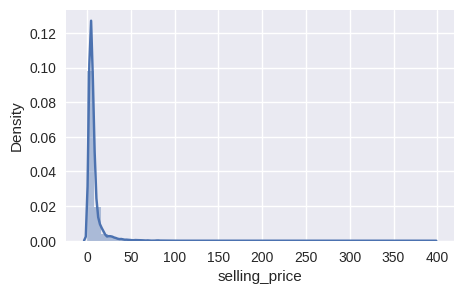

In [168]:
plt.figure(figsize=(5,3))
sns.distplot(y_train)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-169-ee822cf756c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred)


<Axes: ylabel='Density'>

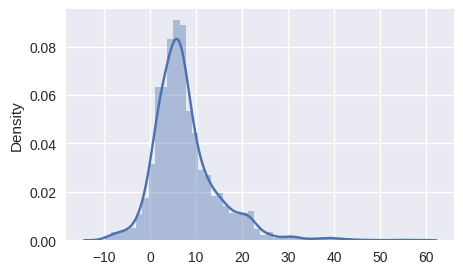

In [169]:
plt.figure(figsize=(5,3))
sns.distplot(y_pred)

## Residual Analysis

The assumptions for residuals in a linear regression model are:

* Linearity: The residuals should be linearly related to the independent variables. This means that the residuals should not have any curvature or other non-linear patterns.
* Homoscedasticity: The residuals should have constant variance. This means that the spread of the residuals should be the same for all values of the independent variables.
* Independence: The residuals should be independent of each other. This means that the value of any one residual should not be related to the value of any other residual.
* Normality: The residuals should be normally distributed. This means that the residuals should be bell-shaped and symmetrical around zero.

### Errors normaly distributed or not?

In [170]:
pred = final_model.predict(x_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
errors = pred - y_train # residual
errors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8586    -2.120688
5073    -7.254301
6643     0.236502
18390   -2.994185
3289     2.484491
           ...   
10955    1.957181
17289    1.607319
5192    -2.010760
12172    4.952249
235      0.249296
Name: selling_price, Length: 17838, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-172-4a151ca7bc24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='selling_price', ylabel='Density'>

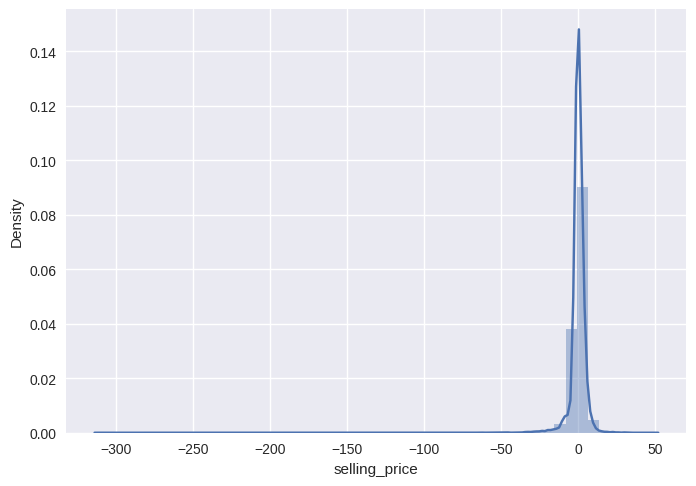

In [172]:
sns.distplot(errors)

### Checking Autocorrelation and Heteroscedasticity(not constant variance)
To way to check:
* using statistical test
* using plot(predicted values vs residual)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


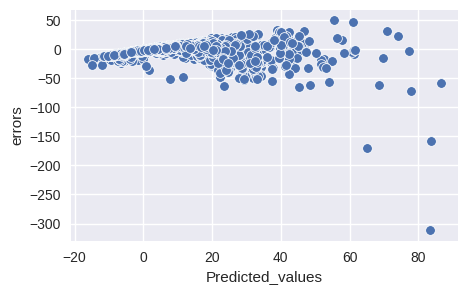

In [173]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred, y=errors)
plt.xlabel("Predicted_values")
plt.ylabel("errors")
plt.show()

In a residual vs. predicted value graph:

1. If the points are randomly scattered around the horizontal line (usually at y=0), it suggests that the model has captured the underlying patterns well, and the residuals have no systematic relationship with the predicted values.
2. If the points follow a clear pattern (e.g., a curve or a funnel shape), it indicates that the model may have systematic errors or is missing important information. This could mean that the model is underfitting or overfitting the data.
3. If the points exhibit heteroscedasticity, meaning that the spread of residuals changes with the predicted values, it suggests that the model's errors are not consistent across the entire range of predicted values.

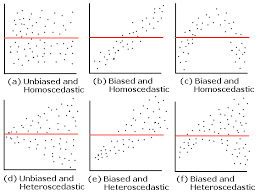

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-174-c6c13807c069>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

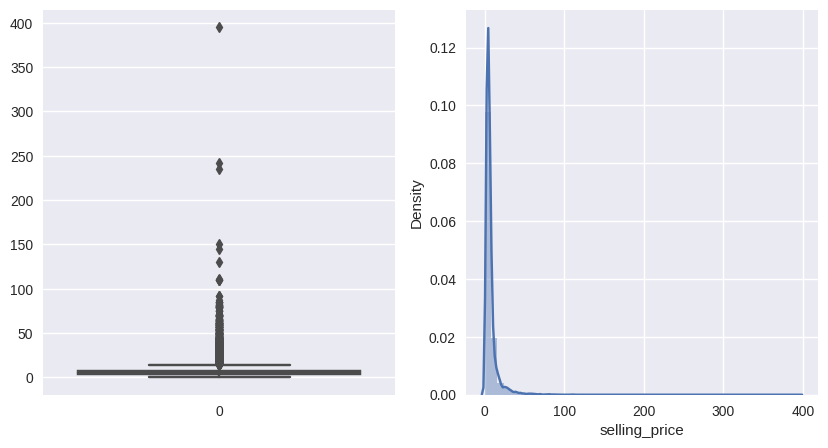

In [174]:
# Removing outlier from selling_price
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.boxplot(df['selling_price'])

plt.subplot(122)
sns.distplot(df['selling_price'])

In [175]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19820, 18)

In [176]:
#calculating selling_price at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["selling_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.3
10 percentile value is 2.3
20 percentile value is 3.0
30 percentile value is 3.75
40 percentile value is 4.5
50 percentile value is 5.2
60 percentile value is 6.0
70 percentile value is 7.0
80 percentile value is 8.75
90 percentile value is 13.5
100 percentile value is  395.0


In [177]:
for i in range(90,100):
    var =df["selling_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 13.5
91 percentile value is 14.5
92 percentile value is 15.6
93 percentile value is 17.0
94 percentile value is 18.5
95 percentile value is 20.95
96 percentile value is 24.99
97 percentile value is 28.5
98 percentile value is 33.5
99 percentile value is 45.0
100 percentile value is  395.0


In [178]:
#calculating selling_price at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["selling_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 45.0
99.1 percentile value is 47.0
99.2 percentile value is 50.0
99.3 percentile value is 52.95
99.4 percentile value is 55.95
99.5 percentile value is 58.1
99.6 percentile value is 61.99
99.7 percentile value is 65.0
99.8 percentile value is 71.99
99.9 percentile value is 82.0
100 percentile value is  395.0


In [179]:
#removing further outliers based on the 99.9th percentile value
df = df[df['selling_price'] <= 82]

In [180]:
df.shape

(19801, 18)

<ipython-input-181-c6c13807c069>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

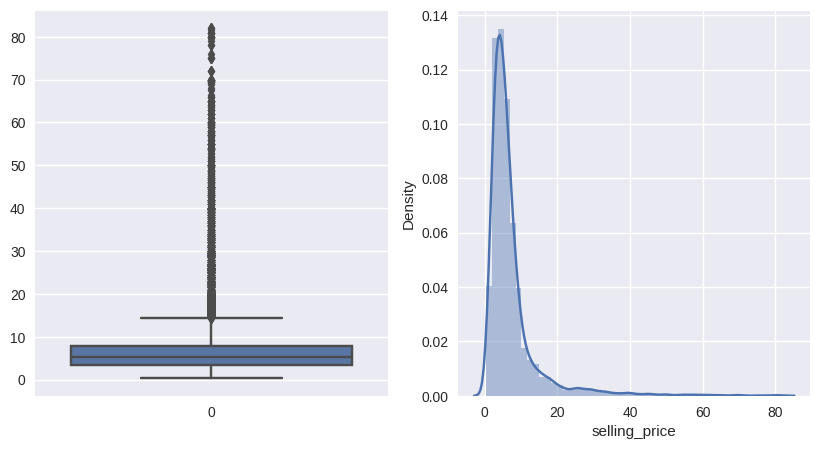

In [181]:
# Removing outlier from selling_price
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.boxplot(df['selling_price'])

plt.subplot(122)
sns.distplot(df['selling_price'])

In [182]:
df = df[df['selling_price'] <= 25]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-183-c6c13807c069>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

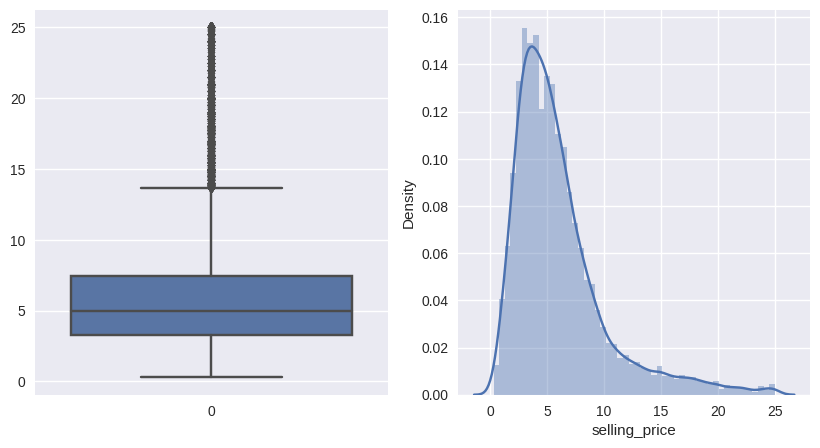

In [183]:
# Removing outlier from selling_price
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.boxplot(df['selling_price'])

plt.subplot(122)
sns.distplot(df['selling_price'])

In [184]:
X = df[cols4]
Y = df['selling_price']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
sc = StandardScaler()
std_X = sc.fit_transform(X)
std_X = pd.DataFrame(data = std_X, columns = X.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
std_X.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,km_driven,year,transmission_type,max_power,engine,seats_coupe
0,1.170598,-0.772937,0.447312,-1.293339,-1.371081,-0.092584
1,-0.747033,0.473532,0.447312,-0.313359,-0.510079,-0.092584
2,0.020019,-1.396172,0.447312,-0.368260,-0.510079,-0.092584
3,-0.421036,-0.772937,0.447312,-0.722371,-0.937359,-0.092584
4,-0.555270,0.161915,0.447312,0.142043,0.136209,-0.092584


In [187]:
x_train, x_test, y_train, y_test = train_test_split(std_X, Y, test_size=0.1, random_state=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
final = LinearRegression()
final.fit(x_train, y_train)

LinearRegression()

In [189]:
final.score(x_train, y_train) # R-square

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6968194825765284

In [190]:
Adjusted_R_Squared = 1 - (1-final.score(std_X,Y)) * (len(Y) - 1) / (len(Y) - std_X.shape[1]-1)
Adjusted_R_Squared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.69558693883487

In [191]:
y_pred = final.predict(x_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)

MAE :  1.568894517199689
MSE :  5.389058229197303
RMSE :  2.3214345196876227


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Residual Analysis after removing outlier

In [193]:
pred = final.predict(x_train)
errors = pred - y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-194-4a151ca7bc24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='selling_price', ylabel='Density'>

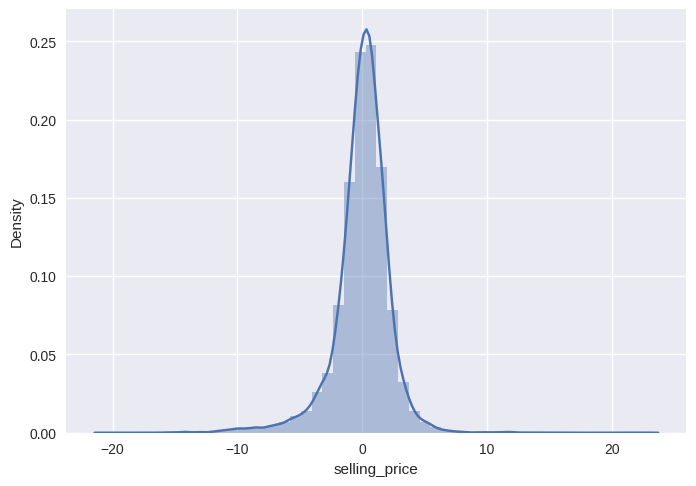

In [194]:
sns.distplot(errors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Errors')

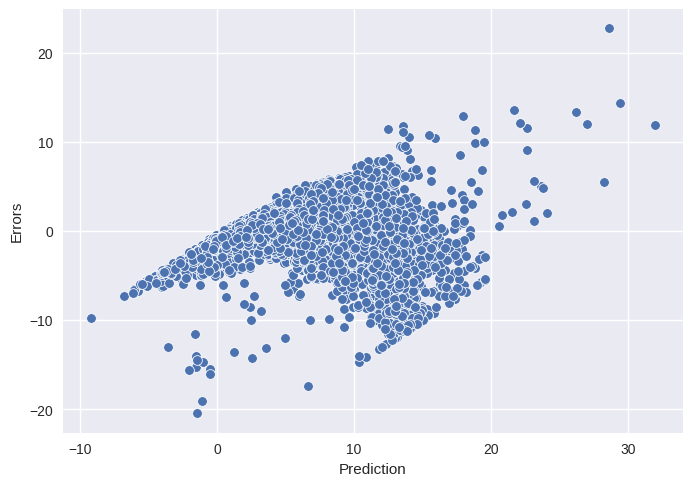

In [195]:
## prediction vs residual plot
sns.scatterplot(x=pred, y=errors)
plt.xlabel("Prediction")
plt.ylabel("Errors")

As selling_price increases, errors also increases, to here is Autocorrelation.

In [196]:
Y_train = np.log(y_train)
Y_test = np.log(y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-197-41c662f48c87>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train)


<Axes: xlabel='selling_price', ylabel='Density'>

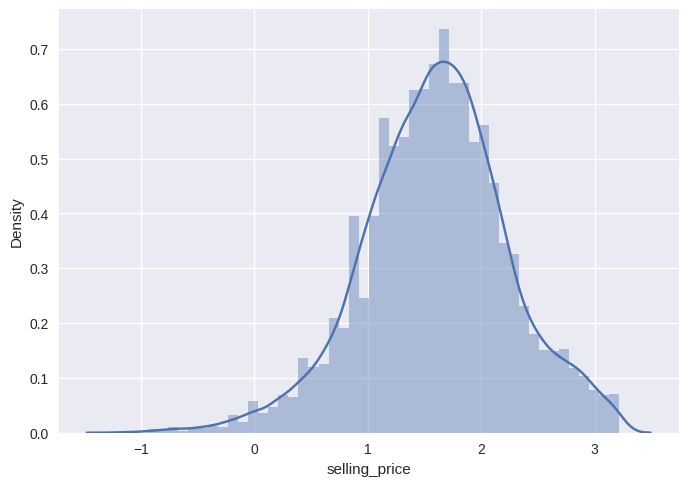

In [197]:
sns.distplot(Y_train)

In [198]:
Y_train.min()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-1.2039728043259361

In [199]:
df['selling_price'].min()

0.3

In [200]:
final2 = LinearRegression()
final2.fit(x_train, Y_train)

LinearRegression()

In [201]:
final2.score(x_train, Y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.786790742277433

In [202]:
Y_pred  =final2.predict(x_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
# Performence matrics on log transform data

MAE = mean_absolute_error(Y_test,Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)
print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)

MAE :  0.22779566164923976
MSE :  0.09582842674956592
RMSE :  0.3095616687343023


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
pred = final2.predict(x_train)
errors  =pred - Y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-205-4a151ca7bc24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='selling_price', ylabel='Density'>

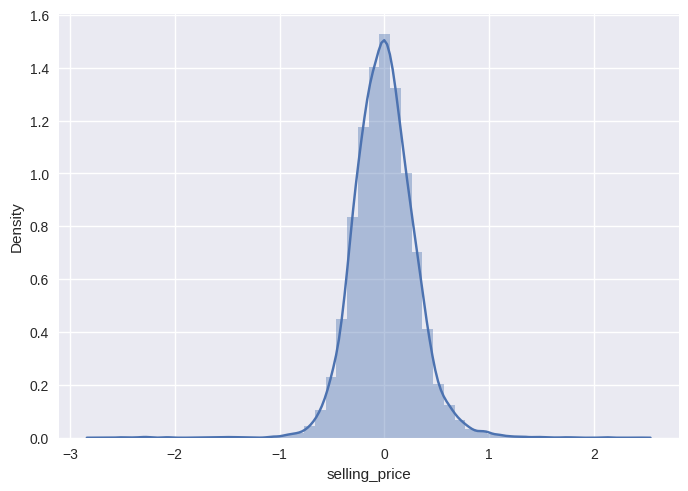

In [205]:
sns.distplot(errors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Errors')

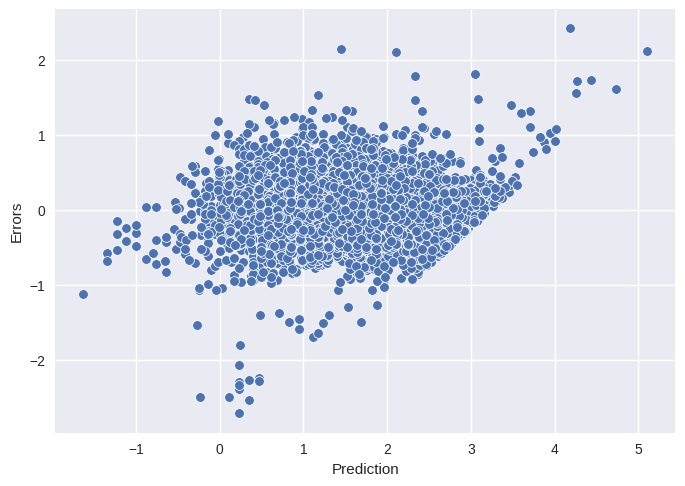

In [206]:
## prediction vs residual plot
sns.scatterplot(x=pred, y=errors)
plt.xlabel("Prediction")
plt.ylabel("Errors")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
